# Обработка текстов

##  Предобработка текстов 

Правильная предобработка текста позволяет добиться:
* улучшения получаемых результатов
* ускорения экспериментов
* воспроизводимости экспериментов
* удобной интерпретации и презентации результатов

### Наивные методы

In [1]:
sent = ''' «Тинькофф Банк» — российский коммерческий банк, сфокусированный полностью на дистанционном обслуживании
, не имеющий розничных отделений. Штаб-квартира банка расположена в Москве.'''
sent.lower()

' «тинькофф банк» — российский коммерческий банк, сфокусированный полностью на дистанционном обслуживании\n, не имеющий розничных отделений. штаб-квартира банка расположена в москве.'

In [2]:
sent.split(" ")

['',
 '«Тинькофф',
 'Банк»',
 '—',
 'российский',
 'коммерческий',
 'банк,',
 'сфокусированный',
 'полностью',
 'на',
 'дистанционном',
 'обслуживании\n,',
 'не',
 'имеющий',
 'розничных',
 'отделений.',
 'Штаб-квартира',
 'банка',
 'расположена',
 'в',
 'Москве.']

### Регулярные выражение

Регулярное выражение — это последовательность символов, используемая для поиска и замены текста в строке или файле

* поиска в строке;
* разбиения строки на подстроки;
* замены части строки.

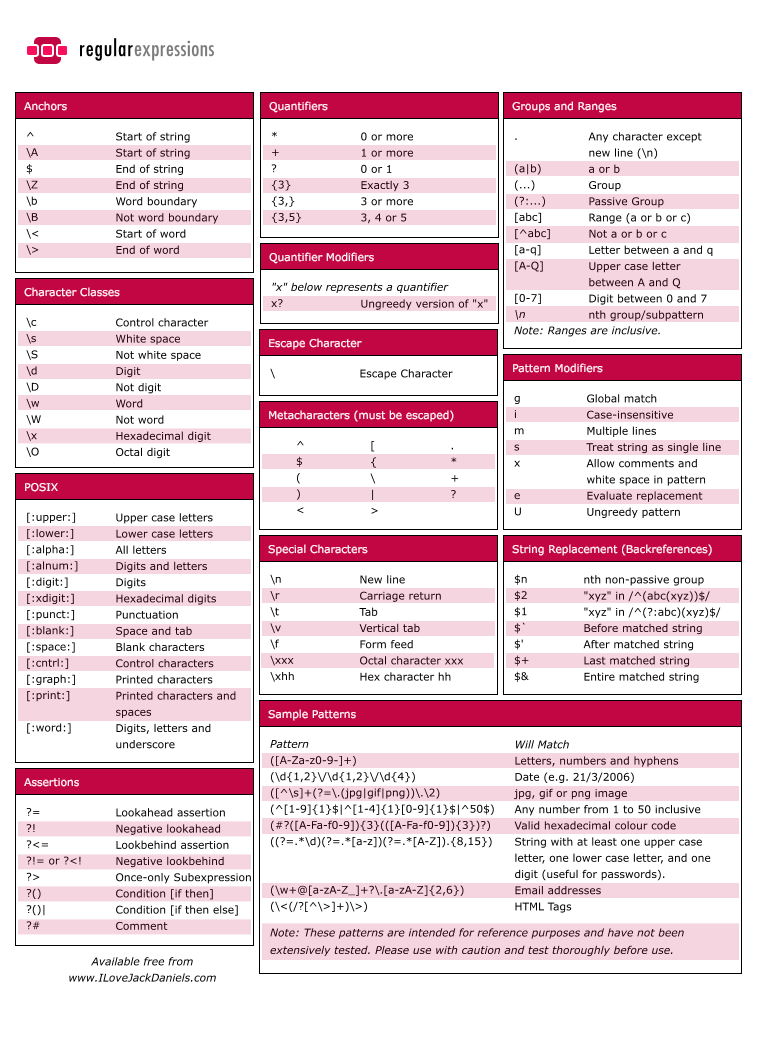

In [3]:
from IPython.display import Image
Image(filename='CheatSheet.png') 

In [4]:
import re

In [5]:
result = re.match(r'Tinkoff', ' junior Tinkoff the best')
result

In [6]:
result = re.search(r'Tinkoff', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

<re.Match object; span=(0, 7), match='Tinkoff'>

In [7]:
result = re.findall(r'Tinkoff', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

['Tinkoff', 'Tinkoff']

In [8]:
result = re.split(r'the', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

['Tinkoff Junior ', ' Best Team Tinkoff Bank']

In [9]:
result = re.sub(r'Bank', 'World', 'Tinkoff Junior the Best Team Tinkoff Bank')
result

'Tinkoff Junior the Best Team Tinkoff World'

можно создавать паттерны

In [10]:
pattern = re.compile('Tinkoff')
result = pattern.findall('Tinkoff Junior the Best Team Tinkoff Bank')
result

['Tinkoff', 'Tinkoff']

In [11]:
line = 'asdf fjdk;afed,fjek,asdf,foo' 
result = re.split(r'[;,\s]', line)
result


['asdf', 'fjdk', 'afed', 'fjek', 'asdf', 'foo']

In [12]:
# TODO: Оставить в тексте только русские буквы

In [13]:
import re
sent = '''Ночь закрытых дверей!!! Штаб-квартира Tinkoff.ru 27 ноября'''
expr = r'[^а-яА-Я]'
parser=re.compile(expr)
tmp_string = re.sub(expr, '', sent)
print(tmp_string)

НочьзакрытыхдверейШтабквартираноября


In [14]:
re.sub(r'\s+',r' ',tmp_string )

'НочьзакрытыхдверейШтабквартираноября'

In [15]:
# TODO: Извлечь домены, заменить все домены на tinkoff.ru

In [16]:
result = re.findall(r'@(\w+).(\w+)', 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz')
result

[('gmail', 'com'), ('test', 'in'), ('analyticsvidhya', 'com'), ('rest', 'biz')]

In [17]:
emails = 'abc.test@gmail.com, xyz@test.in, test.first@analyticsvidhya.com, first.test@rest.biz'
result = re.sub(r'@(\w+)\.(\w+)', '@tinkoff.ru', emails)
result

'abc.test@tinkoff.ru, xyz@tinkoff.ru, test.first@tinkoff.ru, first.test@tinkoff.ru'

Больше примеров регулярных выражений: https://regex101.com/r/nG1gU7/27

### Спелл чекеры - проверка правописания

**Левенштейн**

Расстояние Левенштейна (также редакционное расстояние или дистанция редактирования) между двумя строками в теории информации и компьютерной лингвистике — это минимальное количество операций вставки одного символа, удаления одного символа и замены одного символа на другой, необходимых для превращения одной строки в другую.

In [18]:
!pip install python-Levenshtein

In [19]:
import Levenshtein

https://pypi.org/project/python-Levenshtein/

In [20]:
Levenshtein.distance('Банк', 'ит-компания')

9

In [21]:
Levenshtein.distance('Мика', 'любовь')

6

### Уменьшение словаря
* Плохие слова:
* Слишком частые 
  * русский язык: и, но, я, ты, ... 
  * английский язык: a, the, I, ... 
  * специфичные для коллекции: "сообщать" в новостях
* Слишком редкие
* Стоп-слова 
  *Предлоги, междометия, частицы, цифры

**NLTK**

https://www.nltk.org

In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
from nltk.corpus import stopwords
sw_eng = set(stopwords.words('english'))
list(sw_eng)[:6]

['again', 'same', 'me', "needn't", 'these', 'their']

In [24]:
from nltk.corpus import stopwords
sw_ru = set(stopwords.words('russian'))
list(sw_ru)[:6]

['вдруг', 'совсем', 'тоже', 'ей', 'наконец', 'под']

In [25]:
sent = 'Наступило молчание. Графиня глядела на гостью, приятно улыбаясь, впрочем, не скрывая \
того, что не огорчится теперь нисколько, если гостья поднимется и уедет.\
Дочь гостьи уже оправляла платье, вопросительно глядя на мать, как вдруг из\
соседней комнаты послышался бег к двери нескольких мужских и женских ног,\
грохот зацепленного и поваленного стула, и в комнату вбежала тринадцатилетняя девочка,\
запахнув что-то короткою кисейною юбкою, и остановилась посередине комнаты. Очевидно было,\
она нечаянно, с нерассчитанного бега, заскочила так далеко. В дверях в ту же минуту показались\
студент с малиновым воротником, гвардейский офицер, пятнадцатилетняя девочка и толстый румяный\
мальчик в детской курточке.'

clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])
print('До {} слов'.format(len(sent.split())))
print('После {} слов'.format(len(clean_sent.split())))


До 90 слов
После 66 слов


In [26]:
clean_sent

'Наступило молчание. Графиня глядела гостью, приятно улыбаясь, впрочем, скрывая того, огорчится нисколько, гостья поднимется уедет.Дочь гостьи оправляла платье, вопросительно глядя мать, изсоседней комнаты послышался бег двери нескольких мужских женских ног,грохот зацепленного поваленного стула, комнату вбежала тринадцатилетняя девочка,запахнув что-то короткою кисейною юбкою, остановилась посередине комнаты. Очевидно было,она нечаянно, нерассчитанного бега, заскочила далеко. В дверях ту минуту показалисьстудент малиновым воротником, гвардейский офицер, пятнадцатилетняя девочка толстый румяныймальчик детской курточке.'

In [27]:
sent = 'быть или не быть'
clean_sent = ' '.join([word for word in sent.split() if not word in sw_ru])
clean_sent

''

### Токенизация
разделение на токены, элементарные единицы текста

In [28]:
light_string = 'Привет, какая у меня полная сумма задолженности по кредитной карте'
light_string.split()

['Привет,',
 'какая',
 'у',
 'меня',
 'полная',
 'сумма',
 'задолженности',
 'по',
 'кредитной',
 'карте']

In [29]:
hard_string = 'Ой, у вас несколько кредитных карт, выберите, пожалуйста, одну и введите ее номер'
hard_string.split()

['Ой,',
 'у',
 'вас',
 'несколько',
 'кредитных',
 'карт,',
 'выберите,',
 'пожалуйста,',
 'одну',
 'и',
 'введите',
 'ее',
 'номер']

In [30]:
import re

hard_string = 'Привет! Ты. Видел мр.Смита сегодня утром?'
expr = r'[^(\w.\w)\w\s]'
parser=re.compile(expr)
tmp_string = parser.sub(r'', hard_string)
print(tmp_string.split())

['Привет', 'Ты.', 'Видел', 'мр.Смита', 'сегодня', 'утром']


In [31]:
import re

hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
tmp_string = re.split(r'[!.?]', hard_string)
print(tmp_string)

['Привет', ' Ты видел мр', 'Смита сегодня утром', '']


In [32]:
hard_string = 'Привет. Ты видел мр.Смита сегодня утром?'
exp = r'(?<!\w\.\w.)(?<![А-Я][а-я]\.)(?<=\.|\?)\s'
tmp_string = re.split(exp, hard_string)
print(tmp_string)

['Привет.', 'Ты видел мр.Смита сегодня утром?']


### Нормализация

**Стемминг** - нормализация слов путем отбрасывания окончаний (согласно правилам, основанным на грамматике языка)
* Стеммеры (nltk)
    * Porter stemmer
    * Snowball stemmer
    * Lancaster stemmer
    * MyStem

In [33]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'George admitted the talks happened'
print(' '.join([stemmer.stem(word) for word in sent.split()]))


georg admit the talk happen


In [34]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
sent = 'write wrote written'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

write wrote written


In [35]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='russian')
sent = 'Опрошенные считают налоги необходимыми'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

опрошен счита налог необходим


In [36]:
sent = 'поле пол полка полк'
print(' '.join([stemmer.stem(word) for word in sent.split()]))

пол пол полк полк


In [37]:
sent = 'крутой крутейший крутить'
print(' '.join([stemmer.stem(word) for word in sent.split()]))


крут крут крут


**Лемматизация** - приведение слов к начальной морфологической форме (с помощью словаря и грамматики языка)

Лемматизаторы:
* pymorphy2 (язык русский, украинский)
* mystem3 (язык русский)
* Wordnet Lemmatizer (NLTK, язык английский, требует POS метку)
* Metaphraz (язык русский)
* Coda/Cadenza (языки русский и английский)

Лемматизатор на самом деле довольно сложно устроены, им нужны теги частей речи (POS).

По умолчанию функция WordNetLemmatizer.lemmatize () будет считать, что это слово является существительным, если на входе не обнаружен тег POS.

Сначала вам понадобится функция pos_tag, чтобы пометить предложение и использовать тег, чтобы преобразовать его в теги WordNet, а затем передать его в WordNetLemmatizer.

Примечание. Лемматизация не будет работать только на одиночных словах без контекста или знании своего тега POS 

In [38]:
from nltk import wordnet, pos_tag
def get_wordnet_pos(treebank_tag):
    my_switch = {
        'J': wordnet.wordnet.ADJ,
        'V': wordnet.wordnet.VERB,
        'N': wordnet.wordnet.NOUN,
        'R': wordnet.wordnet.ADV,
    }
    for key, item in my_switch.items():
        if treebank_tag.startswith(key):
            return item
    return wordnet.wordnet.NOUN

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\daris\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
sent = 'George admitted the talks happened'.split()
pos_tagged = pos_tag(sent)
print(pos_tagged)

[('George', 'NNP'), ('admitted', 'VBD'), ('the', 'DT'), ('talks', 'NNS'), ('happened', 'VBD')]


In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
print([get_wordnet_pos(tag) for word, tag in pos_tagged])


AttributeError: module 'nltk.stem.wordnet' has no attribute 'wordnet'

In [ ]:
from nltk import WordNetLemmatizer
def my_lemmatizer(sent):
    lemmatizer = WordNetLemmatizer()
    tokenized_sent = sent.split()
    pos_tagged = [(word, get_wordnet_pos(tag))
                 for word, tag in pos_tag(tokenized_sent)]
    return ' '.join([lemmatizer.lemmatize(word, tag)
                    for word, tag in pos_tagged])

In [ ]:
sent = 'George admitted the talks happened'
my_lemmatizer(sent)

'George admit the talk happen'

In [ ]:
sent = 'write wrote written'
my_lemmatizer(sent)

'write write write'

In [ ]:
!pip install pymorphy2

In [ ]:
import pymorphy2
def my_lemmatizer_ru(sent):
    lemmatizer = pymorphy2.MorphAnalyzer()
    tokenized_sent = sent.split()
    return ' '.join([lemmatizer.parse(word)[0].normal_form
                    for word in tokenized_sent])

In [ ]:
sent = 'Опрошенные считают налоги необходимыми'
my_lemmatizer_ru(sent)

'опросить считать налог необходимый'

In [ ]:
sent = 'Выйду в поле с конем'
my_lemmatizer_ru(sent)

'выйти в поле с конь'

In [ ]:
sent = 'крутой крутейший крутить'
print(my_lemmatizer_ru(sent))

крутой крутый крутить


*Стемминг *
* Плохо работает для русского языка
* Нормально работает для английского
* Повышает качество модели

*Лемматизация*
* Лучше стемминга для русского языка
* Хорошо работает для английского языка
* Повышает качество модели
* Гораздо медленнее чем стемминг

## Представление текста

### One-hot encoding

Представление словаря в виде бинарных векторов, у которых все значения равны 0, кроме одного, отвечающего за соответствующее слово

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
corpus = ['Кредитная Дебетовая', 'Дебетовая', 'All Airlines', 'Bravo', 'All games']
label_encoder = LabelEncoder()
corpus_encoded = label_encoder.fit_transform(corpus)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
corpus_encoded = corpus_encoded.reshape(len(corpus_encoded), 1)
corpus_onehot_encoded = onehot_encoder.fit_transform(corpus_encoded)
print(corpus_onehot_encoded)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


### CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer


CountVectorizer()

In [ ]:
corpus = [
    'This is the first text text text.',
    'This is the second second text.',
    'And the third one.',
    'Is this the first text?',
]
X = vectorizer.fit_transform(corpus)
print(vectorizer.vocabulary_)

{'this': 8, 'is': 2, 'the': 6, 'first': 1, 'text': 5, 'second': 4, 'and': 0, 'third': 7, 'one': 3}


In [ ]:
X.todense()

matrix([[0, 1, 1, 0, 0, 3, 1, 0, 1],
        [0, 0, 1, 0, 2, 1, 1, 0, 1],
        [1, 0, 0, 1, 0, 0, 1, 1, 0],
        [0, 1, 1, 0, 0, 1, 1, 0, 1]], dtype=int64)

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
idf_vectorizer = TfidfVectorizer()

In [ ]:
corpus = [
    'This is the first document.',
    'This is the second second document.',
    'And the third one.',
    'Is this the first document?',
]
Y = idf_vectorizer.fit_transform(corpus)
print(idf_vectorizer.vocabulary_)

{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [ ]:
Y.todense()

matrix([[0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674],
        [0.        , 0.27230147, 0.        , 0.27230147, 0.        ,
         0.85322574, 0.22262429, 0.        , 0.27230147],
        [0.55280532, 0.        , 0.        , 0.        , 0.55280532,
         0.        , 0.28847675, 0.55280532, 0.        ],
        [0.        , 0.43877674, 0.54197657, 0.43877674, 0.        ,
         0.        , 0.35872874, 0.        , 0.43877674]])

## Задача

In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train',
                                  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',
                                 categories=categories, shuffle=True, random_state=42)

In [ ]:
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [ ]:
print(twenty_train.target_names[twenty_train.target[0]])

comp.graphics


In [ ]:
len(twenty_train.data)

2257

In [ ]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [ ]:
twenty_train.target[:10]

array([1, 1, 3, 3, 3, 3, 3, 2, 2, 2], dtype=int64)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [ ]:
X_test_counts = count_vect.transform(twenty_test.data)
X_test_counts.shape

(1502, 35788)

In [ ]:
import warnings

In [ ]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier()
svm.fit(X_train_counts, twenty_train.target)
predicted = svm.predict(X_test_counts)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.83      0.81      0.82       319
         comp.graphics       0.88      0.92      0.90       389
               sci.med       0.90      0.82      0.86       396
soc.religion.christian       0.87      0.93      0.90       398

              accuracy                           0.87      1502
             macro avg       0.87      0.87      0.87      1502
          weighted avg       0.87      0.87      0.87      1502



In [ ]:
# Самостоятельная работа: попробовать другие преобразования

In [ ]:
# Ваш код здесь